In [47]:
import matplotlib.pyplot as plt
import numpy as np
import filter
import os
import sys

# load all measurements
measurements = []
folder_path = os.path.join('..', 'RawMeasurements')

for filename in os.listdir(folder_path):
    if filename.endswith('.npz'):
        filepath = os.path.join(folder_path, filename)
        data = np.load(filepath)
        measurements.append(data)
        

In [48]:
""" print(len(measurements), 'measurements loaded')
#print(len(measurements[0]))
#print(measurements[0]['data'].shape)
sample = 1
index = 0
file = 0
timestamp = measurements[file]['data'][sample][index]
print('timestamp:', timestamp) """

" print(len(measurements), 'measurements loaded')\n#print(len(measurements[0]))\n#print(measurements[0]['data'].shape)\nsample = 1\nindex = 0\nfile = 0\ntimestamp = measurements[file]['data'][sample][index]\nprint('timestamp:', timestamp) "

In [82]:

no_activity = []
# get all measurements without activity, files with "ingen"
for filename in os.listdir(folder_path):
    if "ingen" in filename:
        no_activity.append(np.load(os.path.join(folder_path, filename)))
        print('no activity:', filename)

""" print(len(no_activity), 'no activity measurements loaded')
#print the heads of the measurements
for file in no_activity:
    print(file['data'][:1]) """
import filter  # Ensure filter is imported as a module


test = filter.generate_filter(fs=650)
filtered_no_activity = []

trial = []
for file in no_activity:
    data = file['data']
    timestamp = data[:, 0]
    sensor1 = filter.array_run(data[:,1], test)
    sensor2 = filter.array_run(data[:,2], test)
    up = data[:, 3]
    down = data[:, 4]
    trial.append(np.column_stack((timestamp, sensor1, sensor2, up, down)))
filtered_no_activity = trial



no activity: ingenAktivitet.npz
no activity: ingenAktivitet1.npz
no activity: ingenAktivitetDingler.npz
no activity: ingenAktivitetDingler1.npz


filtered_no_activity: 4


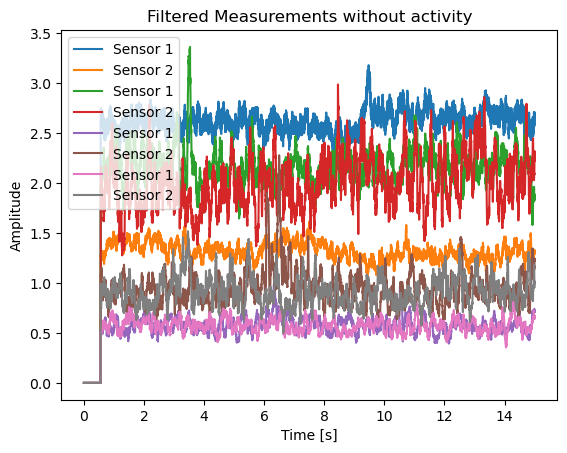

In [87]:
print('filtered_no_activity:', len(filtered_no_activity))

# Plot all measurements without activity
for file in filtered_no_activity:
    plt.plot(file[:, 0], file[:, 1], label='Sensor 1')
    plt.plot(file[:, 0], file[:, 2], label='Sensor 2')
    plt.legend()
    plt.title('Filtered Measurements without activity')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
plt.show()
    #plt.plot(file[:, 0], file[:, 3], label='Up')
    #plt.plot(file[:, 0], file[:, 4], label='Down')
    

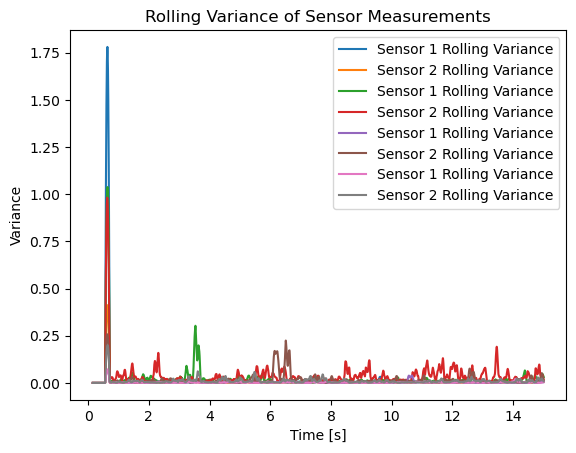

In [98]:
#plot the variance of the sensor measurements for both sensors
import pandas as pd
window_size = 100
for file in filtered_no_activity:
    timestamp = file[:, 0]
    sensor1 = file[:, 1]
    sensor2 = file[:, 2]

    rolling_var_sensor1 = pd.Series(sensor1).rolling(window=window_size).var()
    rolling_var_sensor2 = pd.Series(sensor2).rolling(window=window_size).var()
    
    plt.plot(timestamp, rolling_var_sensor1, label='Sensor 1 Rolling Variance')
    plt.plot(timestamp, rolling_var_sensor2, label='Sensor 2 Rolling Variance')
    plt.legend()
    plt.title('Rolling Variance of Sensor Measurements')
    plt.xlabel('Time [s]')
    plt.ylabel('Variance')

plt.show()

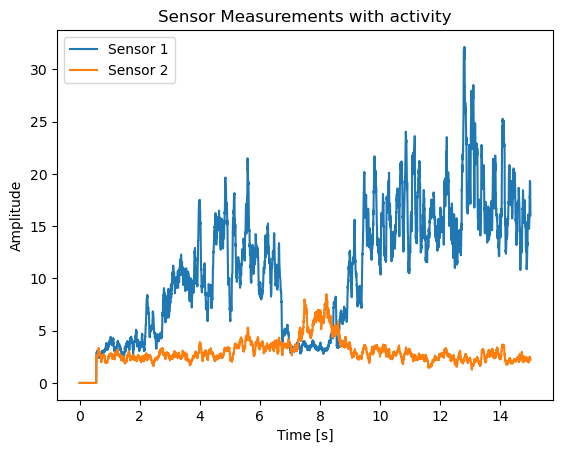

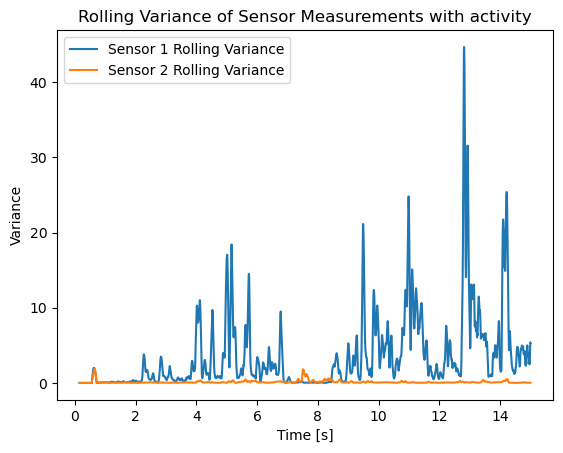

In [107]:

for filename in os.listdir(folder_path):
    if filename == "BevægelseVertikaltExFlex1.npz":
     data = np.load(os.path.join(folder_path, filename))

#plot the sensors from data
data = data['data']
timestamp = data[:, 0]
sensor1 = filter.array_run(data[:, 1], test)
sensor2 = filter.array_run(data[:, 2], test)
up = data[:, 3]
down = data[:, 4]

plt.plot(timestamp, sensor1, label='Sensor 1')
plt.plot(timestamp, sensor2, label='Sensor 2')
plt.legend()
plt.title('Sensor Measurements with activity')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()
# Plot the rolling variance of the sensor measurements for both sensors
rolling_var_sensor1 = pd.Series(sensor1).rolling(window=window_size).var()
rolling_var_sensor2 = pd.Series(sensor2).rolling(window=window_size).var()

plt.plot(timestamp, rolling_var_sensor1, label='Sensor 1 Rolling Variance')
plt.plot(timestamp, rolling_var_sensor2, label='Sensor 2 Rolling Variance')
plt.legend()
plt.title('Rolling Variance of Sensor Measurements with activity')
plt.xlabel('Time [s]')
plt.ylabel('Variance')
plt.show()


In [124]:
WL = 20000*15.5/60

print("It takes", WL, "hours to produce 20000 products")
H = 40*40
A = 0.75
AT = H*A
print("AT", AT, "hours/year")

n = WL/AT
print("n", n, "RobotCells")


It takes 5166.666666666667 hours to produce 20000 products
AT 1200.0 hours/year
n 4.305555555555556 RobotCells


In [134]:
WL = 11000*7
H = 8*3*50
A = 0.75
AT = H*A
n = WL/AT
#print("n", n, "RobotCells")

Da = 11000
Wa = H
Rp = Da/(Wa)
print("Required hourly production rate", Rp, "products/hour")

Tc = 0.75/Rp

w = 7/Tc    
print("Tc", Tc)
print("w", w)

Required hourly production rate 9.166666666666666 products/hour
Tc 0.08181818181818182
w 85.55555555555556
